---
<h1 style="text-align: center;">
Titanic Survival Prediction: Feature Engineering, Model Training and Model Evaluation using Pandas and Scikit-learn
</h1>

<h1 style="text-align: center;">
Task 3
</h1>

<h3 style="text-align: center;">
Oct-29-2024
</h3>

---

### The RMS Titanic was a British ocean liner considered by many as "unsinkable." Unfortunately, the Titanic hit an iceberge and sank on April 15, 1912 on her trip from Southampton, England to New York City, USA. There were not enough lifeboards onboard for everyone and, as a result, an estimated 1500 people died out of the 2224 passengers and crew onboard. The Titanic disaster was one of the deadliest ship sinkings. There was a large element of luck involved in surviving the shipwreck but some people were more likely to survive than others. 

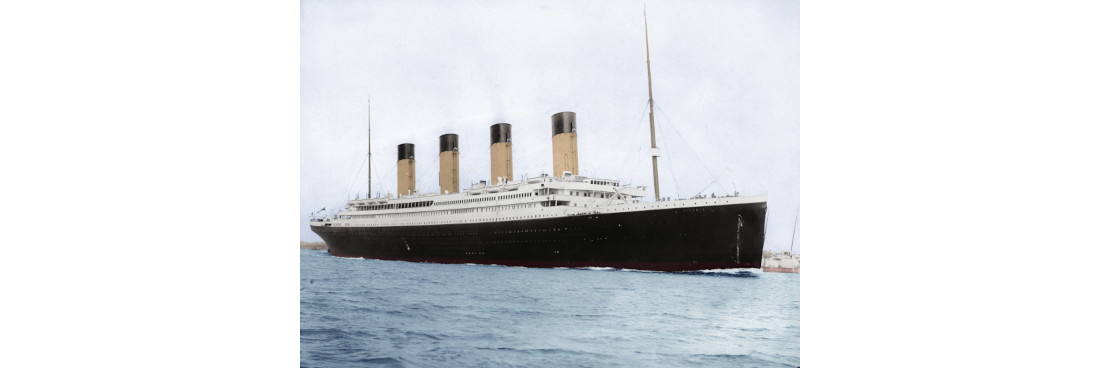


### In this assignment, your task is to predict whether a passenger will survive the shipwreck or not. You need to use machine learning and develop classification models to accomplish this task. The only data you have available is passenger data in the dataset `titanic_dataset.csv` which consists of the following features:
- ### Passenger ID,
- ### Ticket class (1 = first class, 2 = second class, 3 = third class),
- ### Passenger name,
- ### Sex,
- ### Age,
- ### Number of siblings or spouses aboard,
- ### Number of parents or children aboard,
- ### Ticket number,
- ### Fare,
- ### Cabin number, and
- ### Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
### and label:
- ### Survived ($y_i=1$) or
- ### Not survived ($y_i = 0$).
### You must decide if and how to clean and preprocess the data, which classification algorithms to use, which and how to tune any hyperparameters, how to measure performance, which models to select, and which final model to use. 
### Also submit a short report of your work describing all steps you took, explanations of why you took those steps, results, what you learned, how you might use what you learned in the future, and your conclusions.

---

### Write your code here

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
data = pd.read_csv('data/titanic_dataset.csv')

print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0     3.0   
1            2         1     1.0   
2            3         1     3.0   
3            4         1     1.0   
4            5         0     3.0   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0    1.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                             Heikkinen, Miss. Laina  female  26.0    0.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                           Allen, Mr. William Henry    male  35.0    0.0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Data Initialization

print(f"Dataset contains {data.shape[0]} samples and {data.shape[1]-2} features.\n")

print(data.describe())

Dataset contains 894 samples and 10 features.

       PassengerId    Survived      Pclass         Age       SibSp  \
count   894.000000  894.000000  883.000000  716.000000  893.000000   
mean    445.630872    0.383669    2.308041   30.486271    0.849944   
std     257.130413    0.486551    0.835855   23.723847   10.082390   
min       1.000000    0.000000    1.000000  -17.000000   -3.000000   
25%     223.250000    0.000000    2.000000   20.000000    0.000000   
50%     445.500000    0.000000    3.000000   28.000000    0.000000   
75%     667.750000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000  500.000000  300.000000   

             Parch        Fare  
count   894.000000  894.000000  
mean      2.615213   32.189158  
std      66.882170   49.625074  
min       0.000000    0.000000  
25%       0.000000    7.925000  
50%       0.000000   14.454200  
75%       0.000000   31.000000  
max    2000.000000  512.329200  


In [4]:
# Checks for missing values
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass          11
Name             4
Sex              5
Age            178
SibSp            1
Parch            0
Ticket           0
Fare             0
Cabin          690
Embarked        17
dtype: int64


In [5]:
# Data Preprocessing

data.dropna(subset=['Pclass'], inplace=True)


data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Age' column contains numerical data and is less likely to have major outliers. The data is likely to not be skewed, so its better to fill \
# the missing values with the median.

#'Embarked' column contains categorical data, where the mode (frequency) would be the best choice to replace the missing values. Filling \
# with the mode also ensures consistency in the dataset by replecting the most common category.'''

# Converting 'Sex' to numerical values: male = 0, female = 1
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

data = data.dropna(subset=['Sex'])

# One-Hot Encoding on 'Embarked' column
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Drop unnecessary columns: 'PassengerId', 'Name', 'Ticket'
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

print(data.isnull().sum())

# Dropping rows was a more suitable approach for other rows in this context because the majority of rows in the dataset were complete, \
# while the rows with missing values had a large proportion of data missing. Replacing such gaps with imputed values would risk introducing \ 
# inaccuracies or distorting the dataset, making it more reliable to remove those rows entirely.'''

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'Fare']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [7]:
# Handling and Removing Outliers

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers_age = detect_outliers_iqr(data, 'Age')
outliers_fare = detect_outliers_iqr(data, 'Fare')

print(f"Number of outliers in 'Age': {len(outliers_age)}")
print(f"Number of outliers in 'Fare': {len(outliers_fare)}")

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

data = remove_outliers_iqr(data, 'Age')
data = remove_outliers_iqr(data, 'Fare')

print(f"Dataset shape after outlier removal: {data.shape}")

Number of outliers in 'Age': 70
Number of outliers in 'Fare': 115
Dataset shape after outlier removal: (703, 9)


In [8]:
# Define the Features and Target 
X = data.drop('Survived', axis=1)
y = data['Survived']

In [9]:
# Split the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

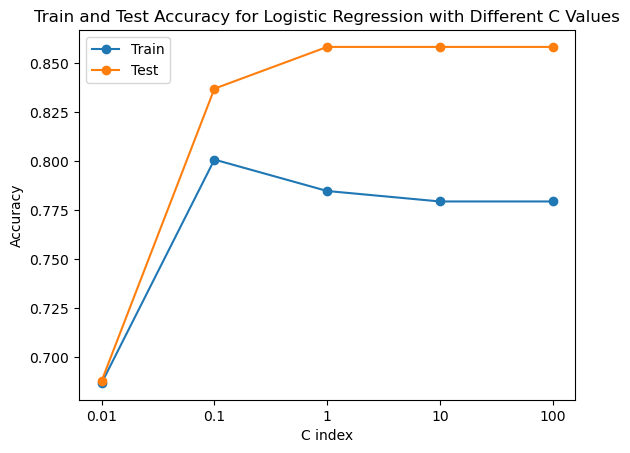


For C: 0.01
  Train Accuracy: 0.6868
  Test Accuracy: 0.6879

For C: 0.1
  Train Accuracy: 0.8007
  Test Accuracy: 0.8369

For C: 1
  Train Accuracy: 0.7847
  Test Accuracy: 0.8582

For C: 10
  Train Accuracy: 0.7794
  Test Accuracy: 0.8582

For C: 100
  Train Accuracy: 0.7794
  Test Accuracy: 0.8582


In [10]:
# Model Training and Evaluation

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# List of regularization strengths to test
C_vals = [0.01, 0.1, 1, 10, 100]

train_accuracy = []
test_accuracy = []

for C in C_vals:
    logreg = LogisticRegression(C=C, max_iter=1000)
    logreg.fit(X_train, y_train)
    
    y_train_pred = logreg.predict(X_train)
    y_test_pred = logreg.predict(X_test)
    
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Plotting the data
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, marker='o')
plt.plot(range(1, len(test_accuracy) + 1), test_accuracy, marker='o')
plt.legend(["Train", "Test"])
plt.xlabel("C index")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, len(C_vals) + 1), C_vals)
plt.title("Train and Test Accuracy for Logistic Regression with Different C Values")
plt.show()

for i, C in enumerate(C_vals):
    print()
    print(f"For C: {C}")
    print(f"  Train Accuracy: {train_accuracy[i]:.4f}")
    print(f"  Test Accuracy: {test_accuracy[i]:.4f}")

In [11]:
# SVM with Scikit-Learn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

train_accuracy = []
test_accuracy = []

C_vals = [0.01, 0.1, 1]

for C in C_vals:
    svm_model = SVC(random_state=0, C=C, kernel = "linear")
    
    svm_model.fit(X_train, y_train)
    
    train_preds = svm_model.predict(X_train)
    test_preds = svm_model.predict(X_test)
    
    train_accuracy.append(accuracy_score(y_train, train_preds))
    test_accuracy.append(accuracy_score(y_test, test_preds))

for i, C in enumerate(C_vals):
    print(f"For C: {C}")
    print(f"  Train Accuracy: {train_accuracy[i]:.4f}")
    print(f"  Test Accuracy: {test_accuracy[i]:.4f}")

For C: 0.01
  Train Accuracy: 0.6637
  Test Accuracy: 0.6596
For C: 0.1
  Train Accuracy: 0.7669
  Test Accuracy: 0.8440
For C: 1
  Train Accuracy: 0.7669
  Test Accuracy: 0.8440


In [12]:
# Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = None)

dt_model.fit(X_train, y_train)

train_preds = dt_model.predict(X_train)
test_preds = dt_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.9768683274021353
Test accuracy: 0.851063829787234


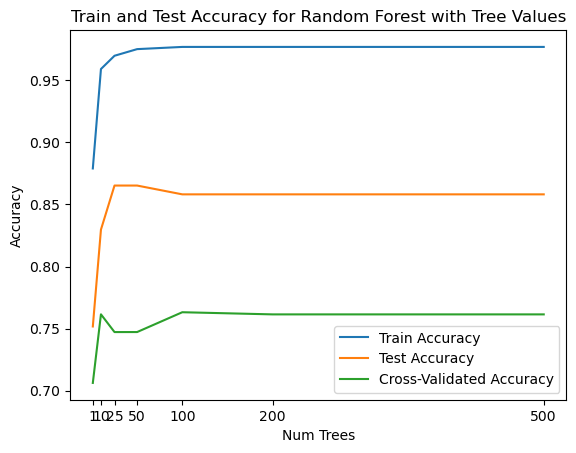


Num Trees: 1
  Train Accuracy: 0.8790
  Test Accuracy: 0.7518
  Cross-Validated Accuracy: 0.7063

Num Trees: 10
  Train Accuracy: 0.9591
  Test Accuracy: 0.8298
  Cross-Validated Accuracy: 0.7616

Num Trees: 25
  Train Accuracy: 0.9698
  Test Accuracy: 0.8652
  Cross-Validated Accuracy: 0.7473

Num Trees: 50
  Train Accuracy: 0.9751
  Test Accuracy: 0.8652
  Cross-Validated Accuracy: 0.7473

Num Trees: 100
  Train Accuracy: 0.9769
  Test Accuracy: 0.8582
  Cross-Validated Accuracy: 0.7632

Num Trees: 200
  Train Accuracy: 0.9769
  Test Accuracy: 0.8582
  Cross-Validated Accuracy: 0.7615

Num Trees: 500
  Train Accuracy: 0.9769
  Test Accuracy: 0.8582
  Cross-Validated Accuracy: 0.7615


In [13]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

train_accuracy = []
test_accuracy = []
cv_accuracy = []

num_trees_vals = [1, 10, 25, 50, 100, 200, 500]

for num_trees in num_trees_vals:
    rf_model = RandomForestClassifier(random_state=0, n_estimators=num_trees, criterion="entropy")
    
    rf_model.fit(X_train, y_train)
    
    train_preds = rf_model.predict(X_train)
    test_preds = rf_model.predict(X_test)
    
    train_accuracy.append(accuracy_score(y_train, train_preds))
    test_accuracy.append(accuracy_score(y_test, test_preds))

    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
    cv_accuracy.append(cv_scores.mean())

plt.plot(num_trees_vals, train_accuracy, label="Train Accuracy")
plt.plot(num_trees_vals, test_accuracy, label="Test Accuracy")
plt.plot(num_trees_vals, cv_accuracy, label="Cross-Validated Accuracy")
plt.xlabel("Num Trees")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Train and Test Accuracy for Random Forest with Tree Values")
plt.xticks(num_trees_vals) 
plt.show()

# Printign the  accuracy values
for i, num_trees in enumerate(num_trees_vals):
    print()
    print(f"Num Trees: {num_trees}")
    print(f"  Train Accuracy: {train_accuracy[i]:.4f}")
    print(f"  Test Accuracy: {test_accuracy[i]:.4f}")
    print(f"  Cross-Validated Accuracy: {cv_accuracy[i]:.4f}")

---

### Write your report here

# Titanic Survival Prediction Report

## Data Initialization

- Loaded the dataset using pandas, and found the number of samples and features (excluding PassengerID and Label).
- Used `data.describe()` to show describe count, mean, std, etc... for the dataset.
- Used `data.isnull().sum()` to find missing values and determine columns that should be dropped or not.

## Data Preprocessing
- Dropped rows with null values in `Pclass`.
- Filled missing `Age` values with the median age and `Embarked` values with the mode value.
- Converted `Sex` to numerical values and removed rows with null values in `Sex`.
- Applied one-hot encoding to the `Embarked` column
- Dropped unnecessary columns: `PassengerId`, `Name`, `Ticket`, and `Cabin`. These columns do not provide enough information for the modeling.
- Identify numerical features with potential outliers: Age and Fare and handled those outliers by removing the ones with extreme values.
  
## Feature Scaling and Dataset Spliting
- Standardized the `Age` and `Fare` columns using `StandardScaler` to normalize the sweked numerical features.
- Split the dataset into Training and Testing Sets using the `model_selection` library.
  
## Model Training and Evaluation

### Logistic Regression
- This test model tested accuracy with different regularization strengths (`C` values).
- Here, I trained a model with `C` values `[0.01, 0.1, 1, 10, 100]`.
- **Results**
    - The **train accuracy** increased as `C` increased, stabilizing around `0.80`
    - The **test accuracy** remained constant after `C =1`
    - The best accuracy was around `C = 0.1` and the model worked well without overfitting

### SVM with Scikit-Learn
- This test model tested accuracy with different `C` values using a linear kernel.
- Here, I gave a SVM model with `C` values `[0.01, 0.1, 1]`.
- **Results**
    - The **train accuracy** increased initially and then stayed the same at around `0.76`
    - The **test accuracy** stabalzied after `0.01` at `0.844`
    - The SVM model was best with low C value at `0.01` or `1` and gave a test accuracy of `0.844`

### Desicion Tree
- This test model evaluated accuracy without setting a maximum depth.
- Here, I trained a decision tree classifier using entropy as the criterion.
- **Results**
    - The **train accuracy** was around `0.9768`
    - The **test accuracy** was around `0.8510`
    - The training accuracy indicated overfitting, but test accruacy gave good generalization

### Random Forest 
- This test model tested accuracy with different numbers of trees and cross-validated accuracy.
- Used cross-validation with 5 folds for each model.
- **Results**
    - The **train accuracy** peaked at `100` trees and stabalized at `0.9769` afterwards
    - The **test accuracy** reached around `0.8652` at `10` trees and stabalized at `0.8582` after that
    - The **cross-validated accuracy** was at `0.8092` at `50` trees and slighly decreased to `0.7615`
    - Higher numbers of trees generally improved accuracy, with best accuracy achieved at around `100` trees

### Final Model Evaluation
From all my findings, I feel the best model out of these was the **Random Forest Model**. This model consistently achieved high accuracy of `0.8582` on both the training and test sets, with a relatively low variance in performance across different numbers of trees compared to the other models. The cross-validated results also gave less overfitting with accuracy of `0.7615`. I feel this model was the most suitable for this dataset compared to the rest

## What you have Learned
From this project, I learned how to work with real-world datasets, handle missing values effectively, and preprocess data to prepare it for machine learning. I also explored different models like Logistic Regression, SVM, Decision Trees, and Random Forests, and saw how changing parameters like C or the number of trees impacts their performance. This taught me the importance of choosing the right model and parameters for the problem and how to use cross-validation to check if a model is generalizing well or overfitting.

### How you might use what you learned in the future?¶
In the future, I can use these skills to work on other datasets and apply similar steps to preprocess data and test different models. I’ll be able to handle missing values, encode categorical variables, and scale features properly before training models. I’ll also focus on using cross-validation to ensure the models I create work well on new data and aren’t just overfitting to the training set. These techniques will help me make better decisions when building machine learning models for various tasks.

---